In [1]:
import numpy as np
import os, sys
from glob import glob
from tqdm import tqdm
from time import time
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
import pandas as pd
import pickle as pkl
import corner

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

def print_stats(y):
    print(f'{np.mean(y):5.5} +/- {np.std(y):5.5}')
    
def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = 40
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.title(f"{title_string}\n{y_mean:5.5} +/- {y_std:5.5}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()


In [2]:
g_sp_free = 5.5857
g_sn_free = - 3.8263
g_lp_free = 1.0
g_ln_free = 0.0
g_sp_brown = 5.15
g_sn_brown = - 3.55
g_lp_brown = 1.159
g_ln_brown = -0.09
g_sis_free = g_sp_free + g_sn_free
g_siv_free = g_sp_free - g_sn_free
g_lis_free = g_lp_free + g_ln_free
g_liv_free = g_lp_free - g_ln_free
g_sis_brown = g_sp_brown + g_sn_brown
g_siv_brown = g_sp_brown - g_sn_brown
g_lis_brown = g_lp_brown + g_ln_brown
g_liv_brown = g_lp_brown + g_ln_brown
g_list_brown = [g_sp_brown,g_sn_brown,g_lp_brown,g_ln_brown]

In [3]:
figsize = (12,12)   #for corner plots
fontsize = 20

# v5.3 Gaussian priors, orbital isoscalar fixed

(3, 147200)


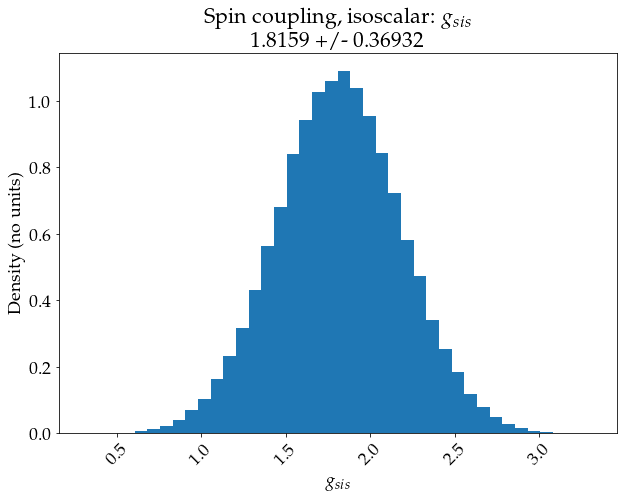

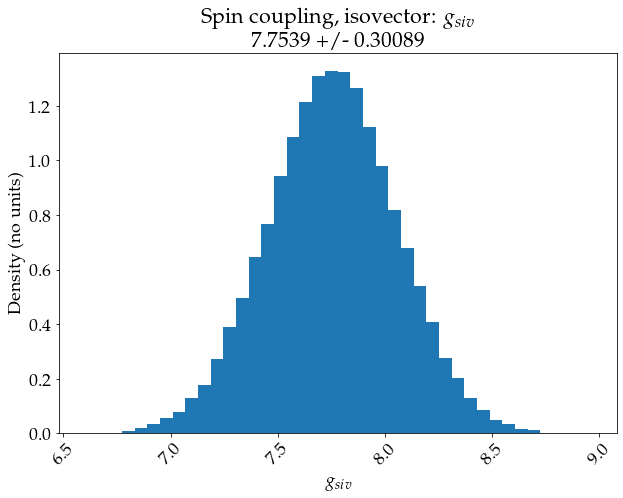

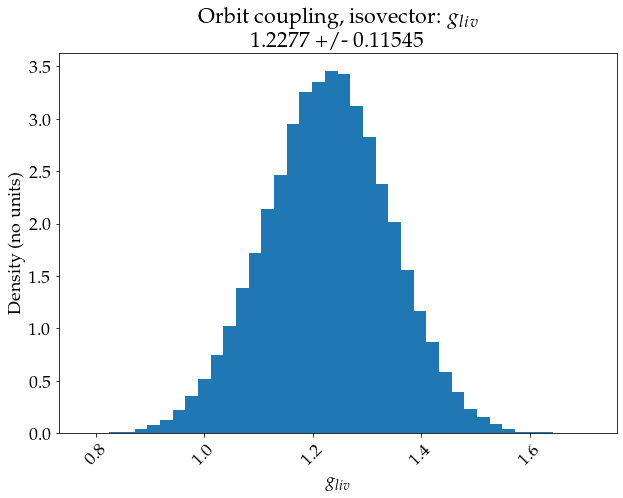

In [4]:
with open('traces/normal_prior_std3x/traces_fixed_lis.pkl','rb') as fh:
    chain = pkl.load(fh)
    
warmup = 400
chain = chain[:,warmup:,:]
chain = np.reshape(chain.T,(3,-1))
print(chain.shape)

g_sis_trace = chain[0].flatten()
g_siv_trace = chain[1].flatten()
g_liv_trace = chain[2].flatten()

make_hist(g_sis_trace,r'Spin coupling, isoscalar: $g_{sis}$',r'$g_{sis}$')
make_hist(g_siv_trace,r'Spin coupling, isovector: $g_{siv}$',r'$g_{siv}$')
make_hist(g_liv_trace,r'Orbit coupling, isovector: $g_{liv}$',r'$g_{liv}$')

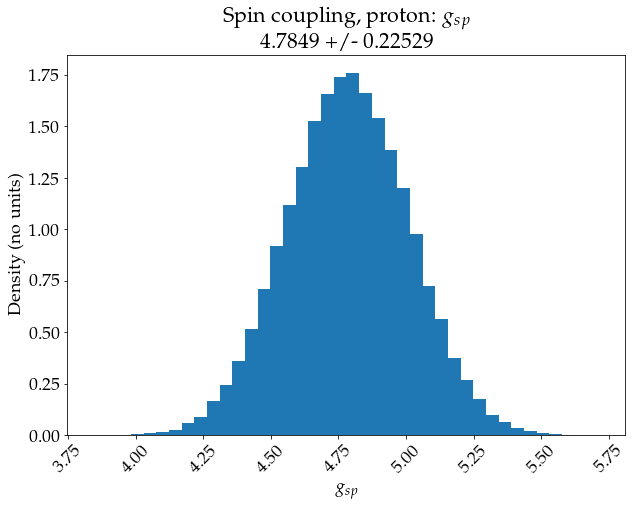

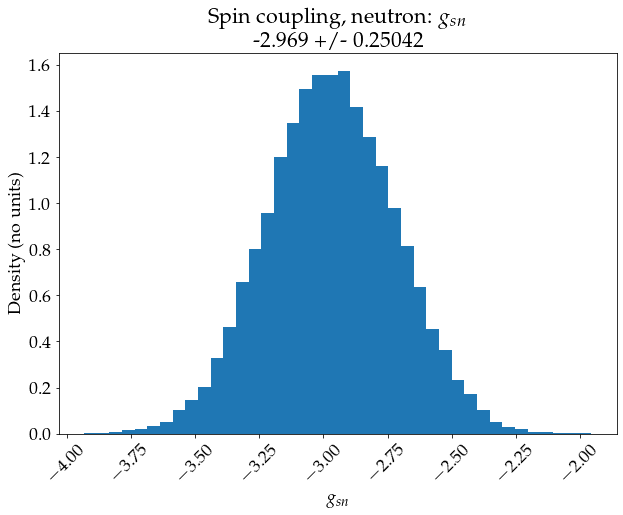

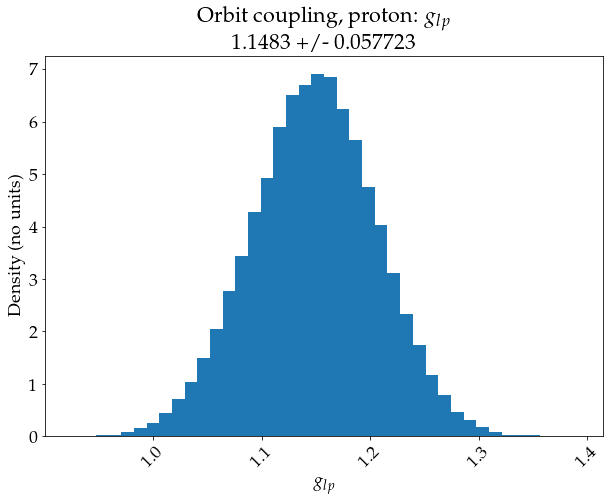

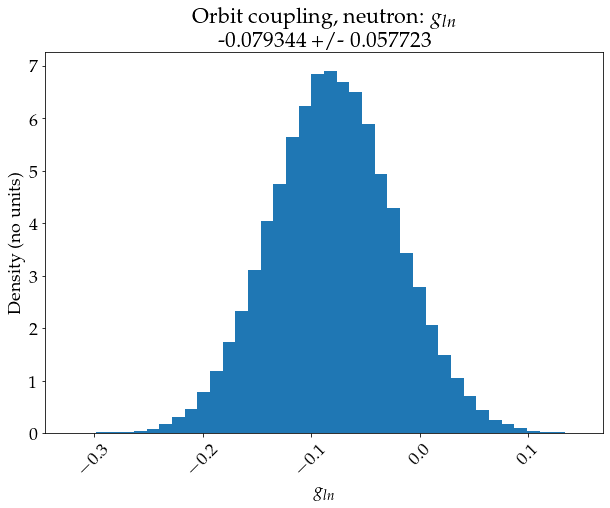

In [5]:
g_sp_trace = 0.5*(g_sis_trace + g_siv_trace)
g_sn_trace = 0.5*(g_sis_trace - g_siv_trace)
g_lp_trace = 0.5*(g_lis_brown + g_liv_trace)
g_ln_trace = 0.5*(g_lis_brown - g_liv_trace)

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

# Drop outliers

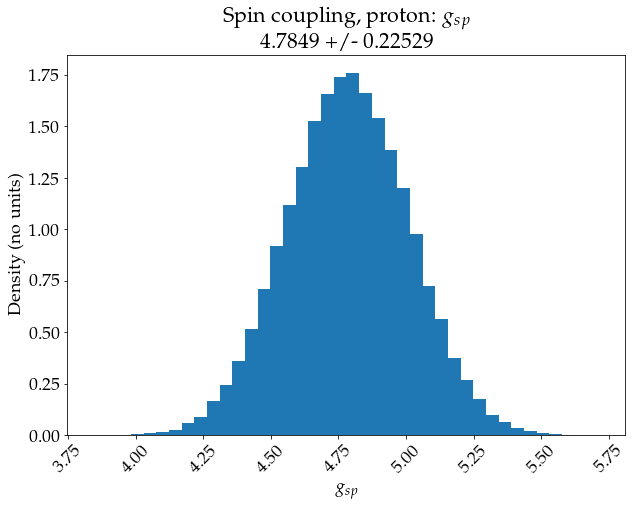

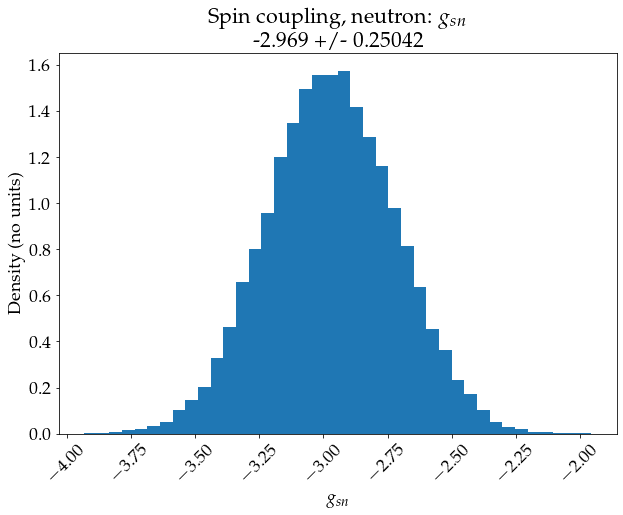

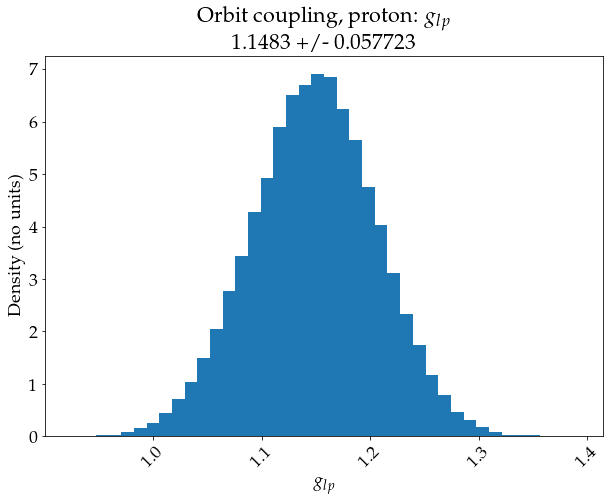

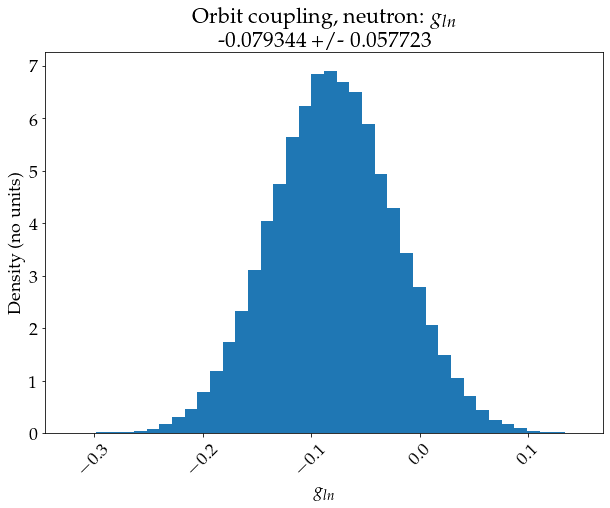

In [6]:
g_sp_low_limit = 2
g_sp_top_limit = 8
g_sn_low_limit = -5
g_sn_top_limit = 0
g_lp_low_limit = 0.75
g_lp_top_limit = 1.75

indices = (g_sp_trace > g_sp_low_limit) & (g_sp_trace < g_sp_top_limit) & (g_sn_trace > g_sn_low_limit) & (g_sn_trace < g_sn_top_limit) & (g_lp_trace > g_lp_low_limit) & (g_lp_trace < g_lp_top_limit)
 
g_sp_trace = g_sp_trace[indices]
g_sn_trace = g_sn_trace[indices]
g_lp_trace = g_lp_trace[indices]
g_ln_trace = g_ln_trace[indices]

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

In [7]:
# data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T

# f = plt.figure(figsize=(10,10))
# figure = corner.corner(data,
#                        labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
#                        quantiles=[0.16, 0.5, 0.84],
#                        show_titles=True, title_kwargs={"fontsize": 16},
#                       fig=f)

# print(f'cc = {np.corrcoef(data.T)}')

cc = [[ 1.          0.20321951 -0.20982366  0.20982366]
 [ 0.20321951  1.          0.08602534 -0.08602534]
 [-0.20982366  0.08602534  1.         -1.        ]
 [ 0.20982366 -0.08602534 -1.          1.        ]]


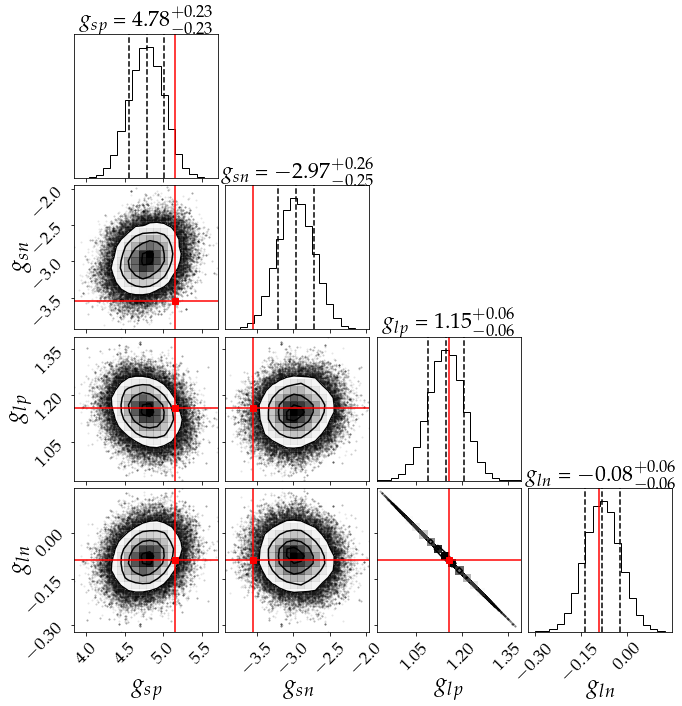

In [13]:
data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T

g_list_brown = [g_sp_brown,g_sn_brown,g_lp_brown,g_ln_brown]

# f = plt.figure(figsize=(10,10))
figure = corner.corner(data,
                       labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
#                        label_kwargs={"fontsize": fontsize},
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, 
                       title_kwargs={"fontsize": 22},
                       truths=g_list_brown, truth_color='red',truth_style='-.',
#                        fig=f,        
                       label_kwargs={'size':24},
                       max_n_ticks = 4,
                      )

print(f'cc = {np.corrcoef(data.T)}')

plt.savefig('corner_fixed_lis_normal_prior_v2.png',dpi=300)

# v5.4 Gaussian priors, orbital isovector fixed

(3, 147200)


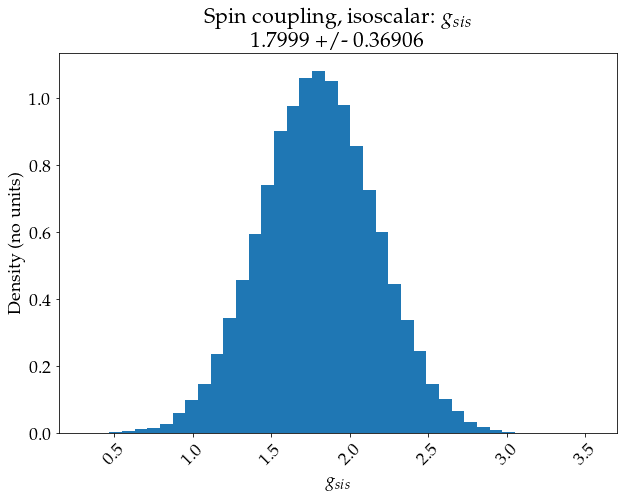

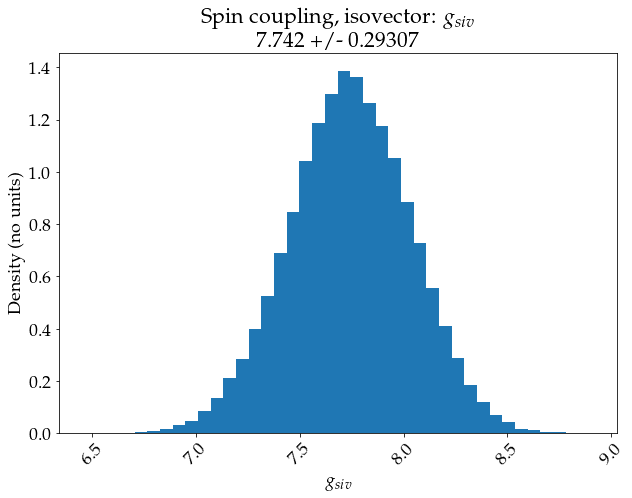

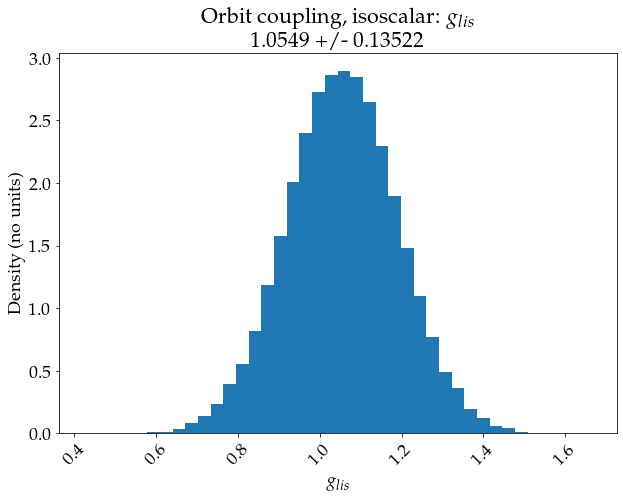

In [14]:
with open('traces/normal_prior_std3x/traces_fixed_liv.pkl','rb') as fh:
    chain = pkl.load(fh)

# chain = [g_sis, g_siv, g_liv]
    
warmup = 400
chain = chain[:,warmup:,:]
chain = np.reshape(chain.T,(3,-1))
print(chain.shape)

g_sis_trace = chain[0].flatten()
g_siv_trace = chain[1].flatten()
g_lis_trace = chain[2].flatten()

make_hist(g_sis_trace,r'Spin coupling, isoscalar: $g_{sis}$',r'$g_{sis}$')
make_hist(g_siv_trace,r'Spin coupling, isovector: $g_{siv}$',r'$g_{siv}$')
make_hist(g_lis_trace,r'Orbit coupling, isoscalar: $g_{lis}$',r'$g_{lis}$')

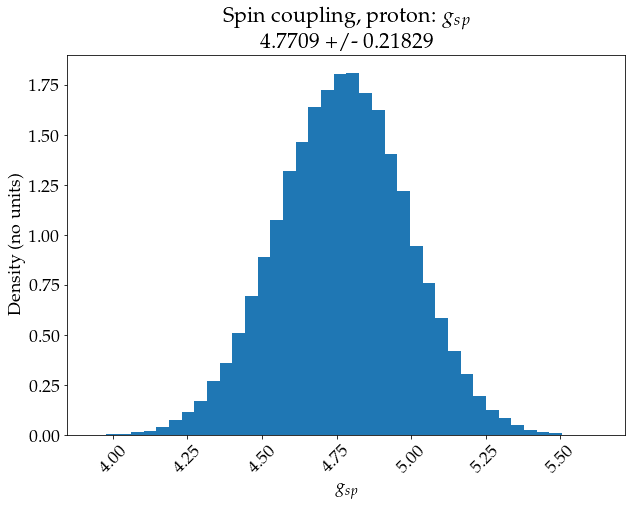

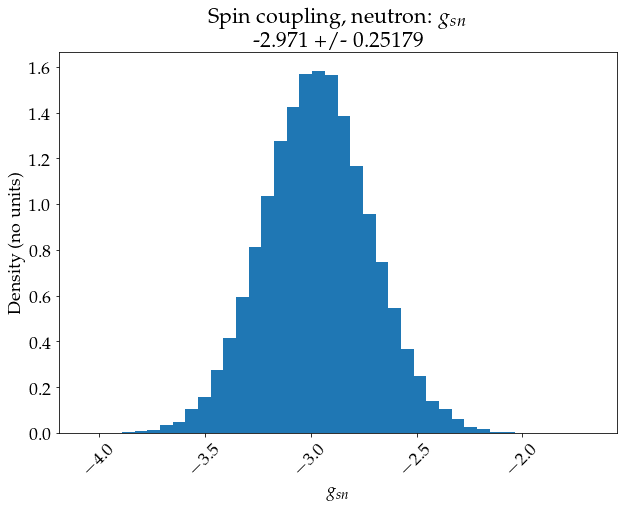

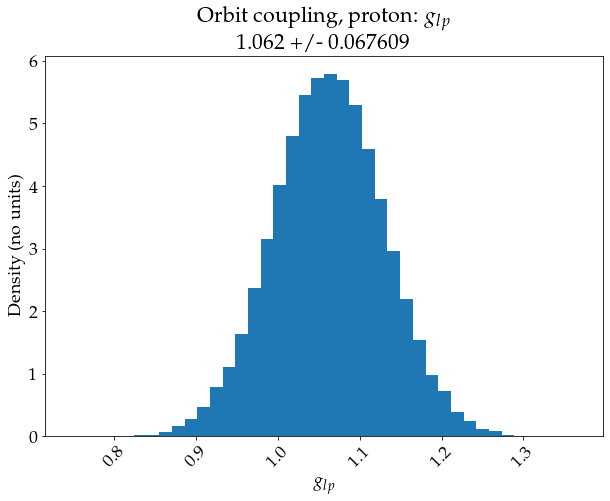

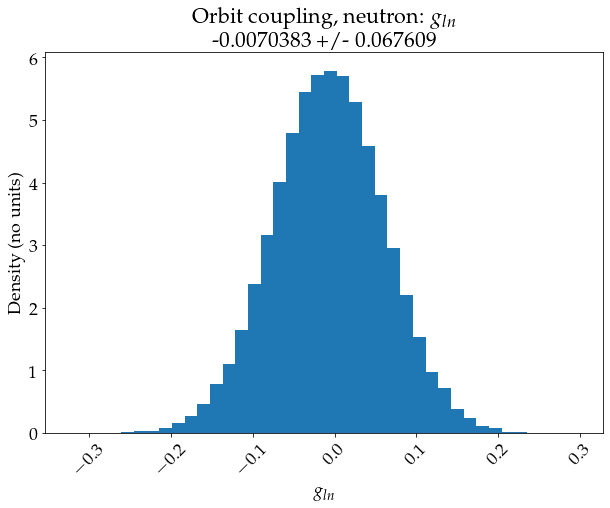

In [15]:
# take orbital isovector (liv) from Brown
g_sp_trace = 0.5*(g_sis_trace + g_siv_trace)
g_sn_trace = 0.5*(g_sis_trace - g_siv_trace)
g_lp_trace = 0.5*(g_lis_trace + g_liv_brown)
g_ln_trace = 0.5*(g_lis_trace - g_liv_brown)

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

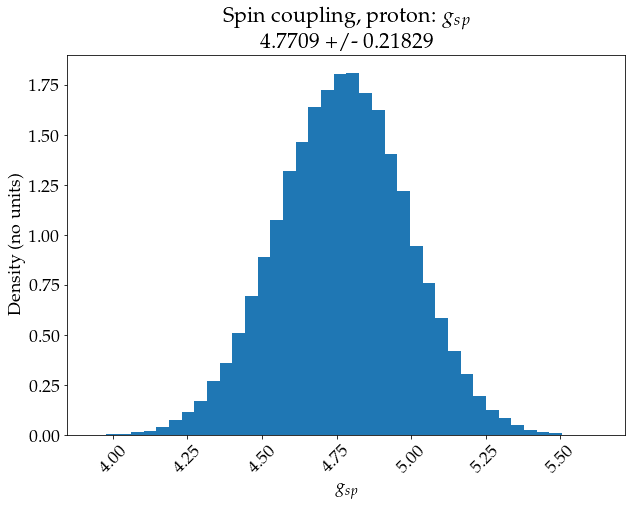

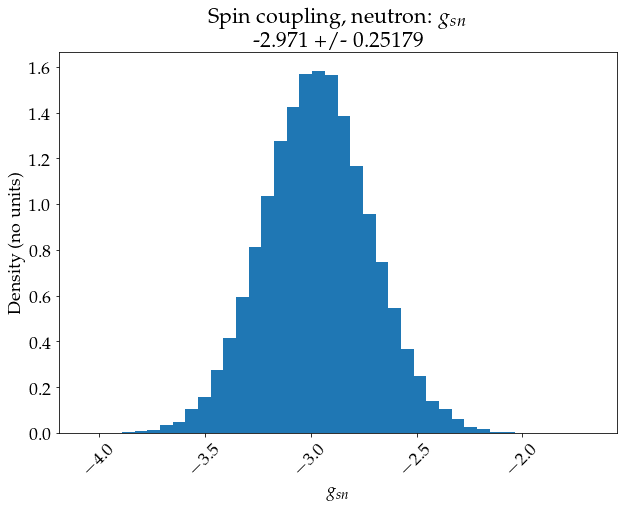

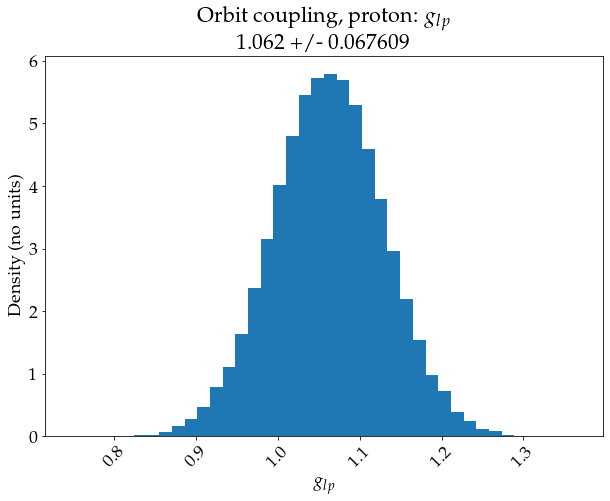

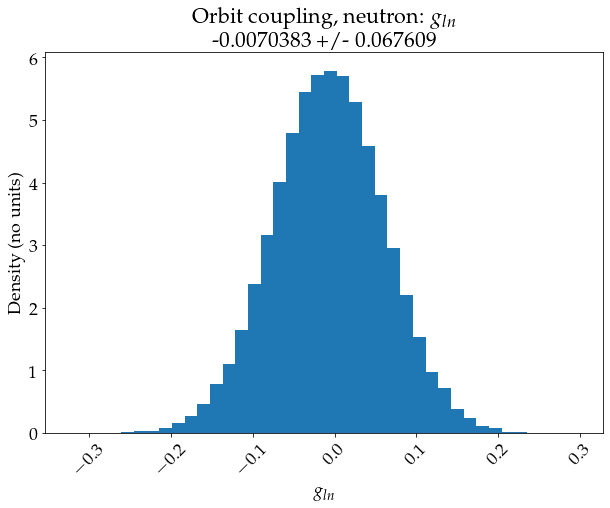

In [16]:
g_sp_low_limit = 2
g_sp_top_limit = 8
g_sn_low_limit = -6
g_sn_top_limit = 0

indices = (g_sp_trace > g_sp_low_limit) & (g_sp_trace < g_sp_top_limit)  
g_sp_trace = g_sp_trace[indices]
g_sn_trace = g_sn_trace[indices]
g_lp_trace = g_lp_trace[indices]
g_ln_trace = g_ln_trace[indices]

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

In [17]:
# data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T
# f = plt.figure(figsize=(10,10))
# figure = corner.corner(data,
#                        labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
#                        quantiles=[0.16, 0.5, 0.84],
#                        show_titles=True, title_kwargs={"fontsize": 16},
#                       fig=f)

# print(f'cc = {np.corrcoef(data.T)}')

cc = [[1.         0.22883953 0.05781136 0.05781136]
 [0.22883953 1.         0.04200018 0.04200018]
 [0.05781136 0.04200018 1.         1.        ]
 [0.05781136 0.04200018 1.         1.        ]]


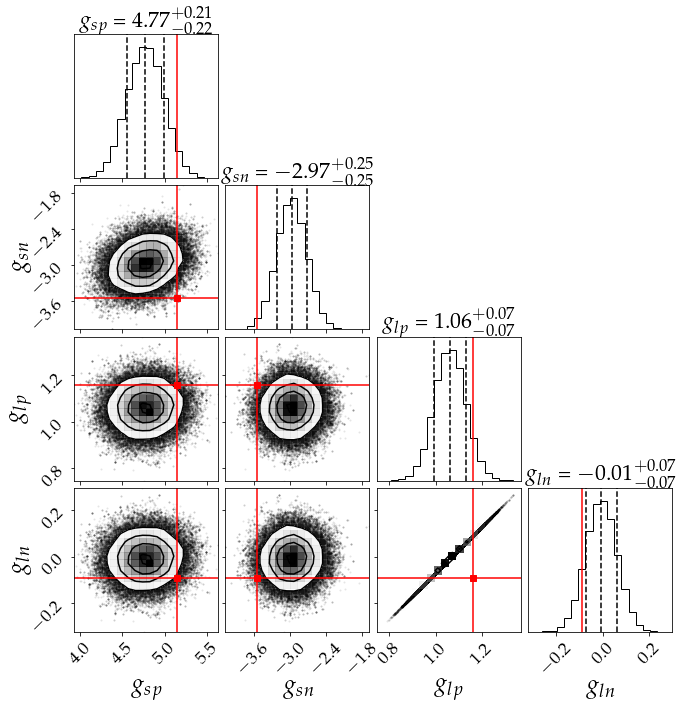

In [18]:
data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T
# f = plt.figure(figsize=figsize)
figure = corner.corner(data,
                       labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, 
                       title_kwargs={"fontsize": 22},
                       truths=g_list_brown, truth_color='red',truth_style='-.',
#                       fig=f,         
                       label_kwargs={'size':24},
                       max_n_ticks = 4,
                      )

print(f'cc = {np.corrcoef(data.T)}')

plt.savefig('corner_fixed_liv_normal_prior_v2.png',dpi=300)

# v5.5 : Spin isoscalar fixed

(3, 147200)


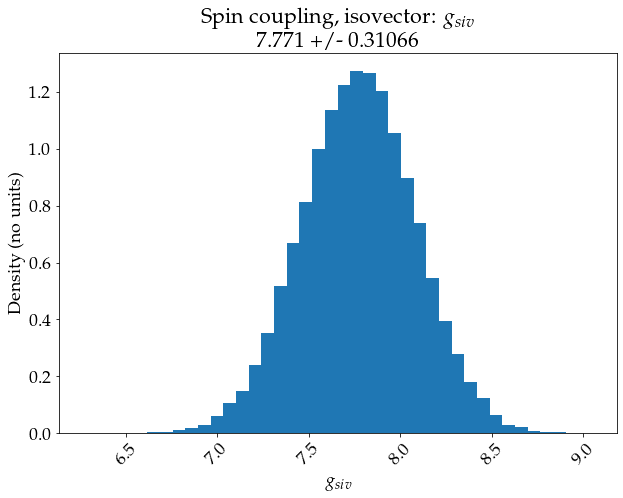

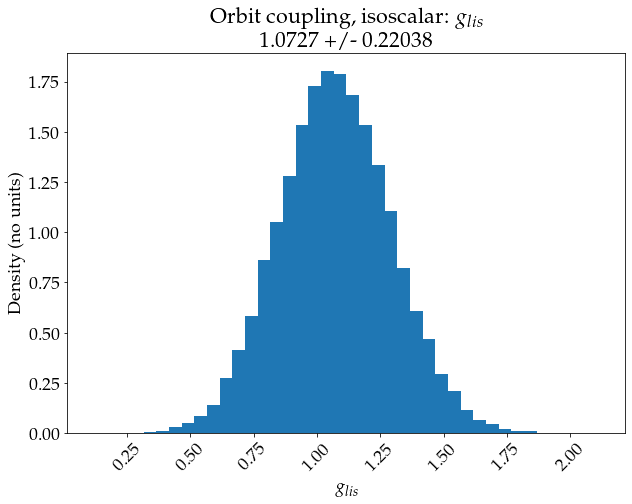

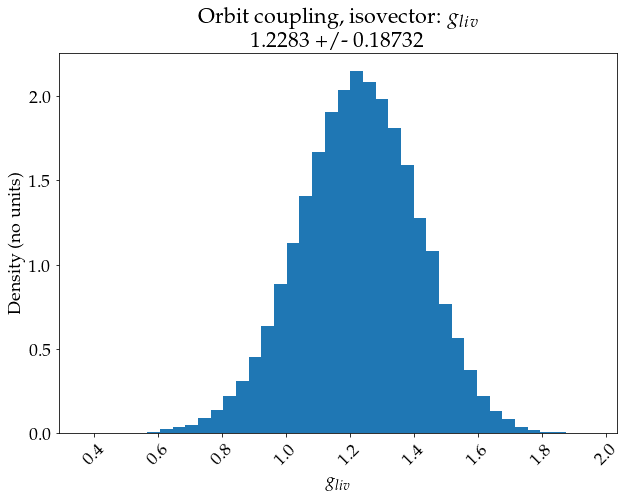

In [19]:
with open('traces/normal_prior_std3x/traces_fixed_sis.pkl','rb') as fh:
    chain = pkl.load(fh)

warmup = 400
chain = chain[:,warmup:,:]
chain = np.reshape(chain.T,(3,-1))
print(chain.shape)

g_siv_trace = chain[0].flatten()
g_lis_trace = chain[1].flatten()
g_liv_trace = chain[2].flatten()

make_hist(g_siv_trace,r'Spin coupling, isovector: $g_{siv}$',r'$g_{siv}$')
make_hist(g_lis_trace,r'Orbit coupling, isoscalar: $g_{lis}$',r'$g_{lis}$')
make_hist(g_liv_trace,r'Orbit coupling, isovector: $g_{liv}$',r'$g_{liv}$')

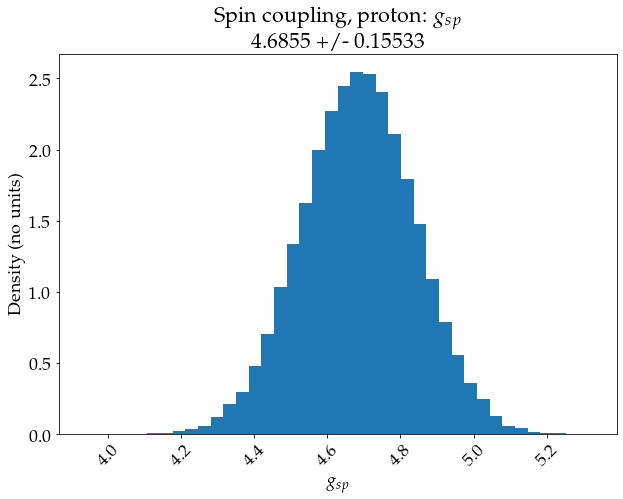

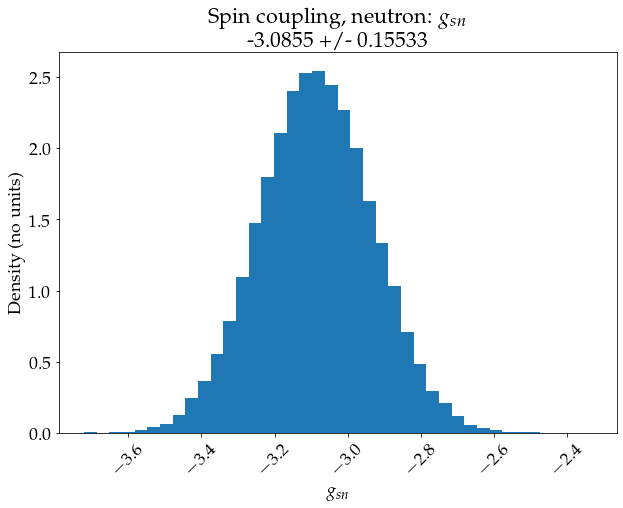

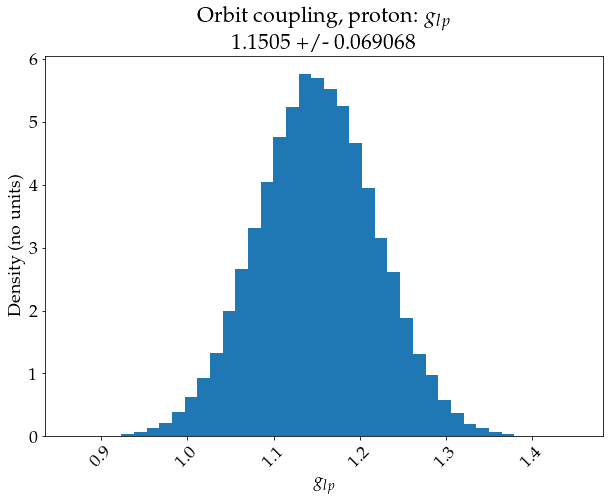

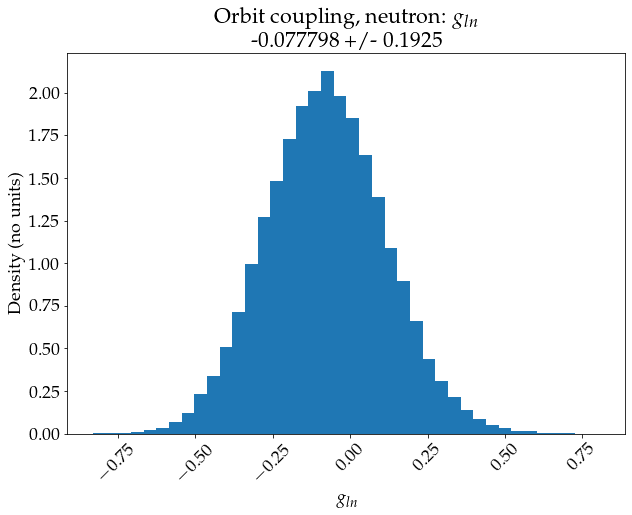

In [20]:
# take spin isoscalar (sis) from Brown
g_sp_trace = 0.5*(g_sis_brown + g_siv_trace)
g_sn_trace = 0.5*(g_sis_brown - g_siv_trace)
g_lp_trace = 0.5*(g_lis_trace + g_liv_trace)
g_ln_trace = 0.5*(g_lis_trace - g_liv_trace)

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

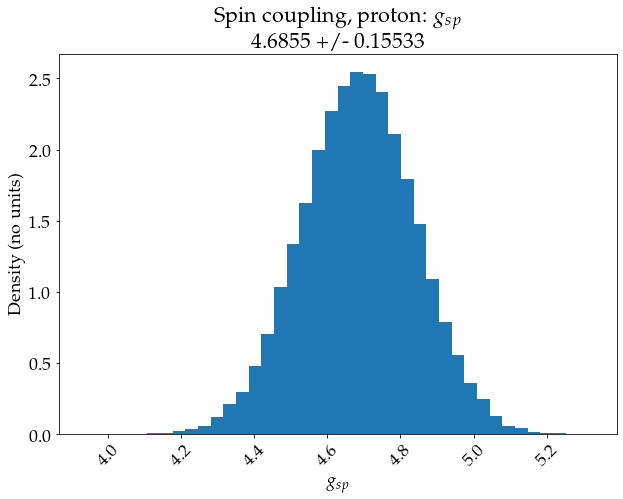

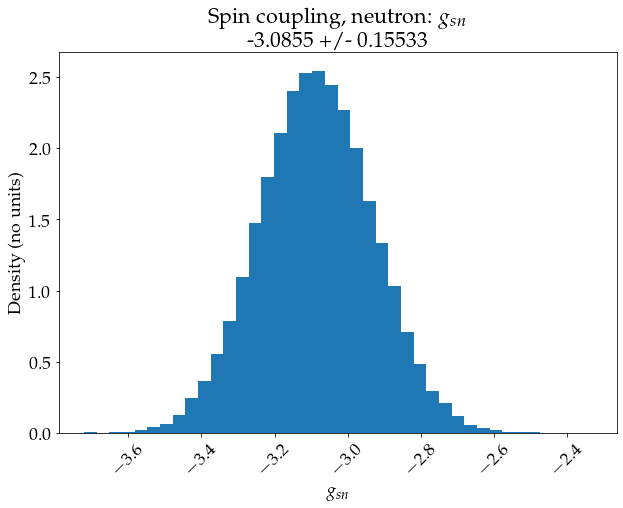

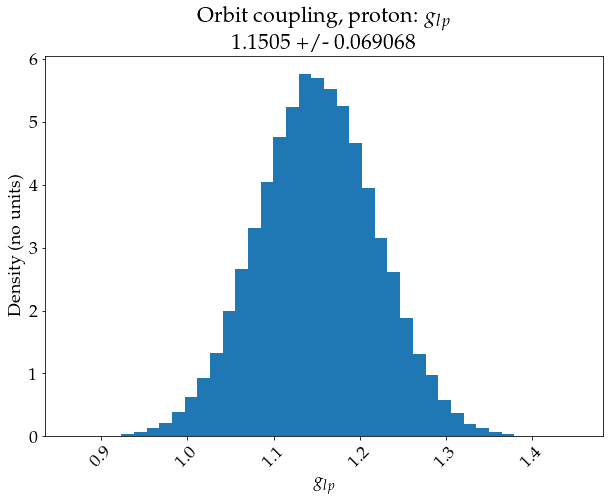

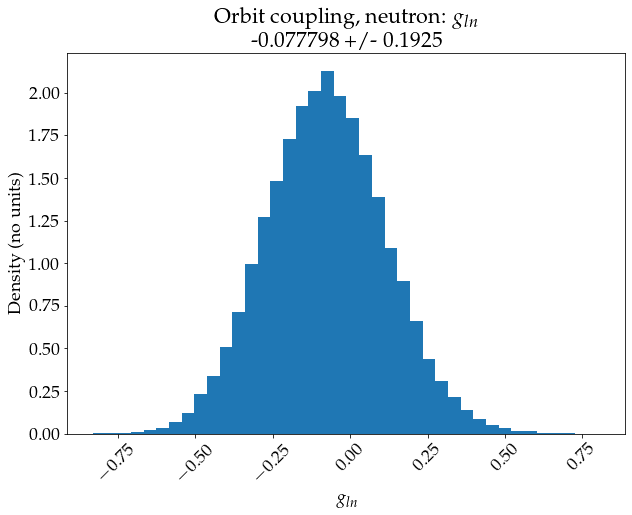

In [21]:
g_sp_low_limit = 2
g_sp_top_limit = 8
g_sn_low_limit = -5
g_sn_top_limit = 0
g_lp_low_limit = 0
g_lp_top_limit = 2.5

indices = (g_sp_trace > g_sp_low_limit) & (g_sp_trace < g_sp_top_limit) & (g_sn_trace > g_sn_low_limit) & (g_sn_trace < g_sn_top_limit) & (g_lp_trace > g_lp_low_limit) & (g_lp_trace < g_lp_top_limit)
 
g_sp_trace = g_sp_trace[indices]
g_sn_trace = g_sn_trace[indices]
g_lp_trace = g_lp_trace[indices]
g_ln_trace = g_ln_trace[indices]

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

In [22]:
# data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T

# f = plt.figure(figsize=(10,10))
# figure = corner.corner(data,
#                        labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
#                        quantiles=[0.16, 0.5, 0.84],
#                        show_titles=True, title_kwargs={"fontsize": 16},
#                       fig=f)

# print(f'cc = {np.corrcoef(data.T)}')

cc = [[ 1.         -1.         -0.01930568  0.36696182]
 [-1.          1.          0.01930568 -0.36696182]
 [-0.01930568  0.01930568  1.          0.25348424]
 [ 0.36696182 -0.36696182  0.25348424  1.        ]]


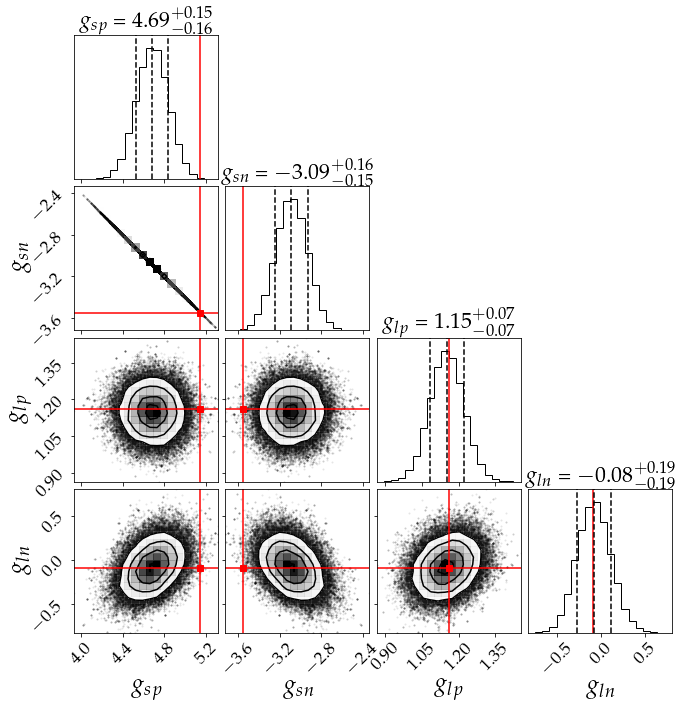

In [23]:
data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T
# f = plt.figure(figsize=figsize)
figure = corner.corner(data,
                       labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, 
                       title_kwargs={"fontsize": 22},
                       truths=g_list_brown, truth_color='red',truth_style='-.',
#                       fig=f,         
                       label_kwargs={'size':24},
                       max_n_ticks = 4,
                      )

print(f'cc = {np.corrcoef(data.T)}')

plt.savefig('corner_fixed_sis_normal_prior_v2.png',dpi=300)

# v5.6 : Spin isovector fixed

(3, 147200)


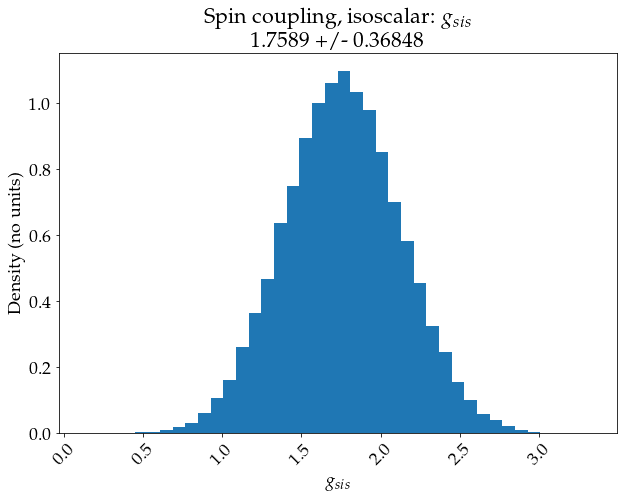

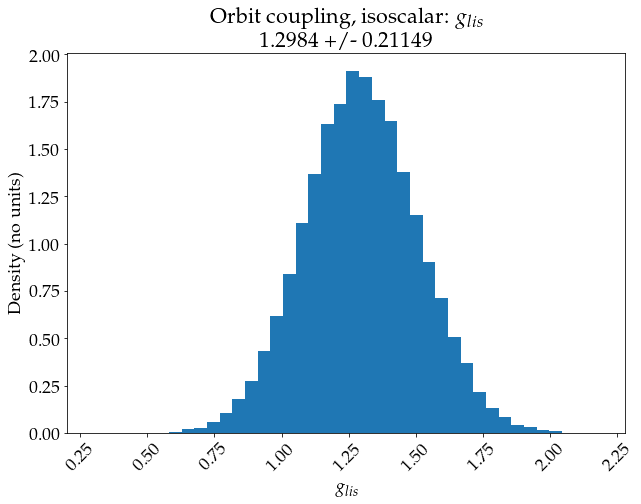

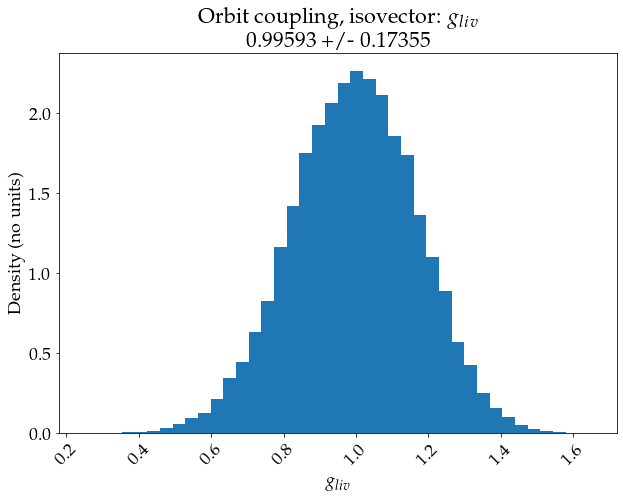

In [24]:
with open('traces/normal_prior_std3x/traces_fixed_siv.pkl','rb') as fh:
    chain = pkl.load(fh)

warmup = 400
chain = chain[:,warmup:,:]
chain = np.reshape(chain.T,(3,-1))
print(chain.shape)

g_sis_trace = chain[0].flatten()
g_lis_trace = chain[1].flatten()
g_liv_trace = chain[2].flatten()

make_hist(g_sis_trace,r'Spin coupling, isoscalar: $g_{sis}$',r'$g_{sis}$')
make_hist(g_lis_trace,r'Orbit coupling, isoscalar: $g_{lis}$',r'$g_{lis}$')
make_hist(g_liv_trace,r'Orbit coupling, isovector: $g_{liv}$',r'$g_{liv}$')

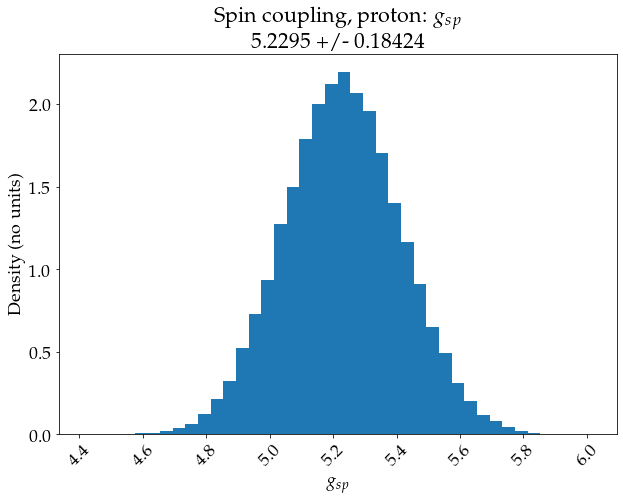

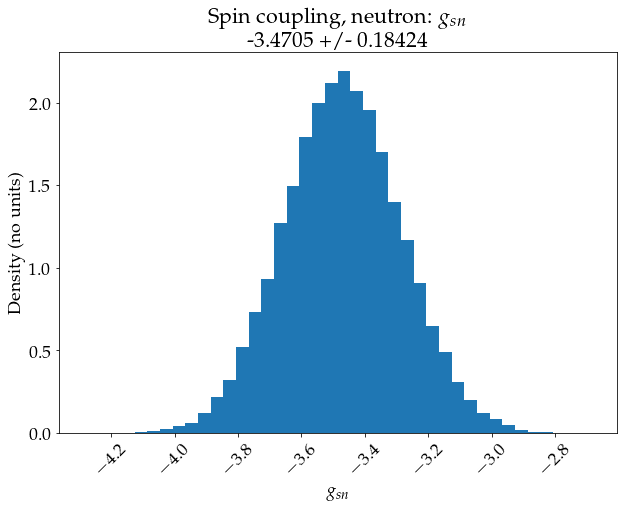

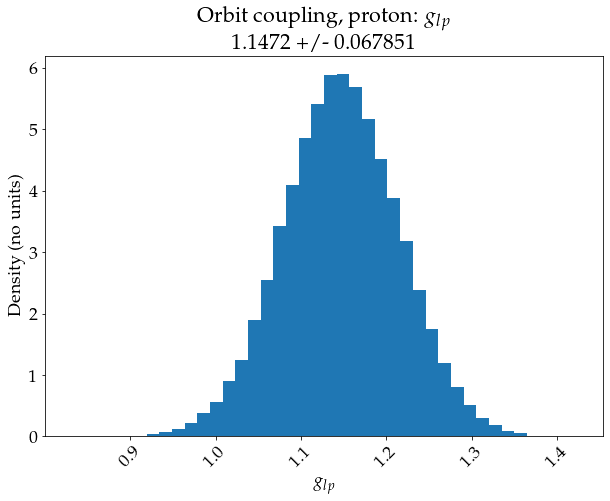

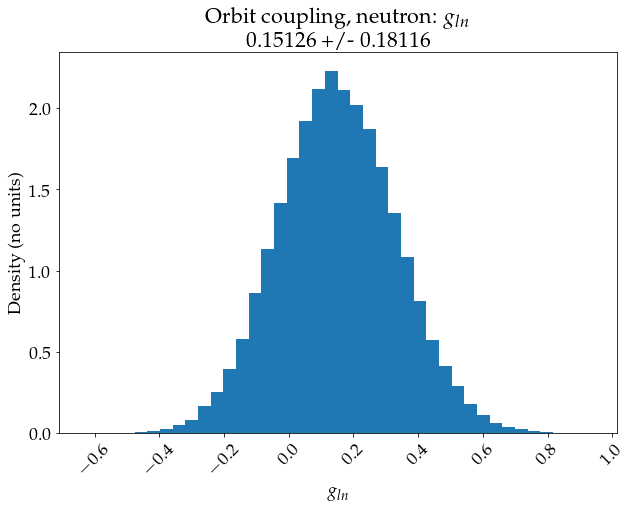

In [25]:
# take spin isoscalar (siv) from Brown
g_sp_trace = 0.5*(g_sis_trace + g_siv_brown)
g_sn_trace = 0.5*(g_sis_trace - g_siv_brown)
g_lp_trace = 0.5*(g_lis_trace + g_liv_trace)
g_ln_trace = 0.5*(g_lis_trace - g_liv_trace)

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

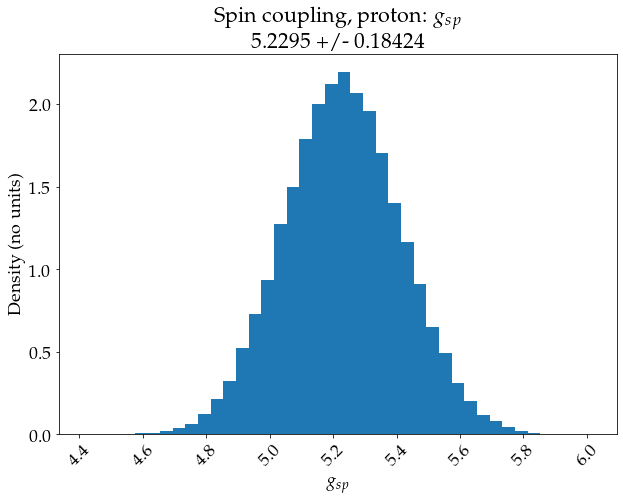

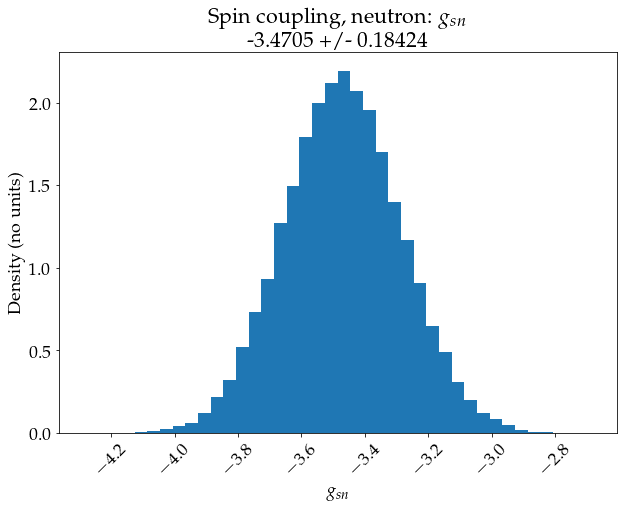

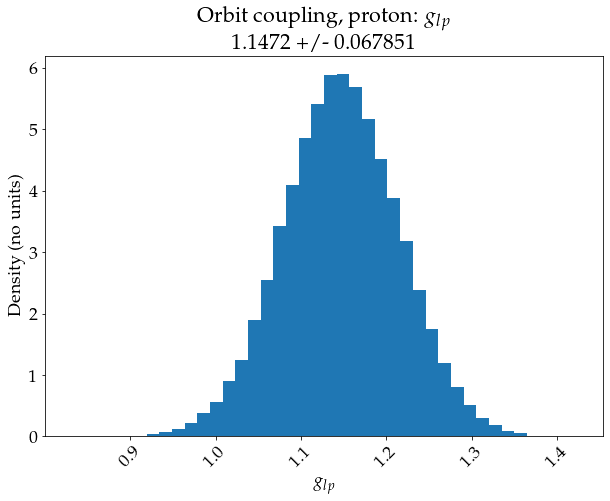

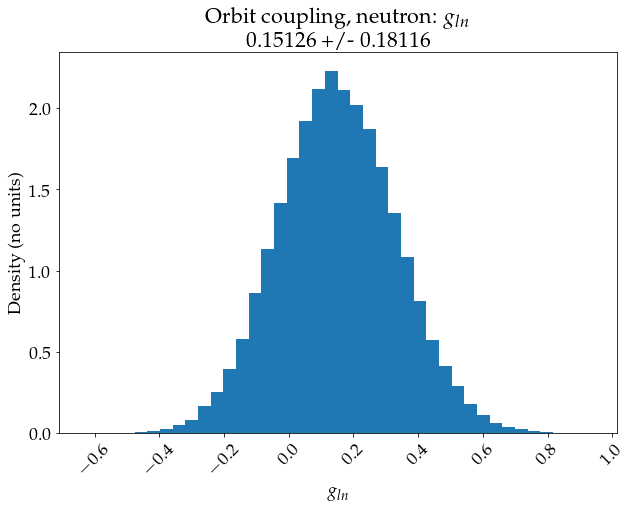

In [26]:
# g_sp_low_limit = 2
# g_sp_top_limit = 8
# g_sn_low_limit = -5
# g_sn_top_limit = 0
g_lp_low_limit = 0
g_lp_top_limit = 2
g_ln_low_limit = -1
g_ln_top_limit = 1

indices = (g_lp_trace > g_lp_low_limit) & (g_lp_trace < g_lp_top_limit) & (g_ln_trace > g_ln_low_limit) & (g_ln_trace < g_ln_top_limit)
g_sp_trace = g_sp_trace[indices]
g_sn_trace = g_sn_trace[indices]
g_lp_trace = g_lp_trace[indices]
g_ln_trace = g_ln_trace[indices]

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

In [27]:
# data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T
# f = plt.figure(figsize=(10,10))
# figure = corner.corner(data,
#                        labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
#                        quantiles=[0.16, 0.5, 0.84],
#                        show_titles=True, title_kwargs={"fontsize": 16},
#                       fig=f)

# print(f'cc = {np.corrcoef(data.T)}')

cc = [[1.         1.         0.05318991 0.19644601]
 [1.         1.         0.05318991 0.19644601]
 [0.05318991 0.05318991 1.         0.29708864]
 [0.19644601 0.19644601 0.29708864 1.        ]]


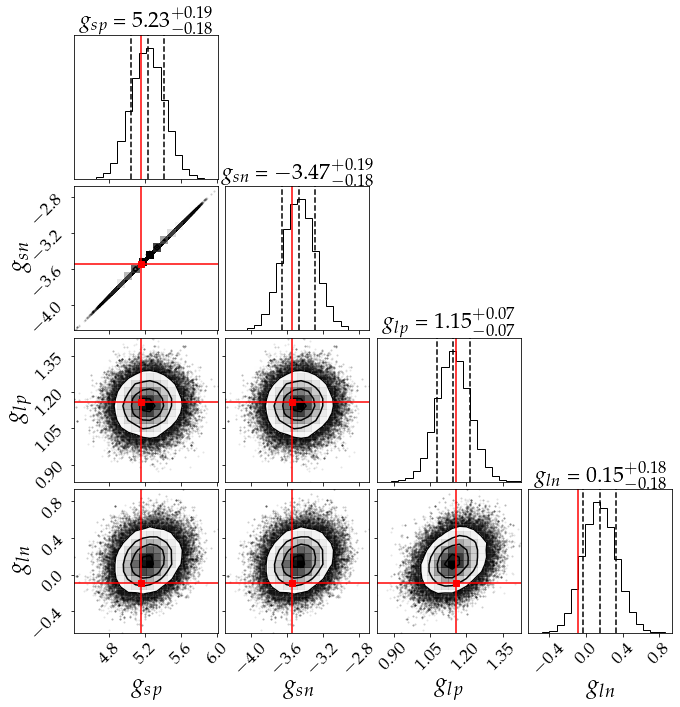

In [28]:
data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T
# f = plt.figure(figsize=figsize)
figure = corner.corner(data,
                       labels=[r'$g_{sp}$',r'$g_{sn}$',r'$g_{lp}$',r'$g_{ln}$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True,
                       title_kwargs={"fontsize": 22},
                       truths=g_list_brown, truth_color='red',truth_style='-.',
#                       fig=f,
                       label_kwargs={'size':24},
                       max_n_ticks = 4,
                      )

print(f'cc = {np.corrcoef(data.T)}')

plt.savefig('corner_fixed_siv_normal_prior_v2.png',dpi=300)